# 코로나 발발 직후, 국가 정책에 대한 데이터 분석 시각화

In [1]:
# 필요한 모듈 import
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# numpy 와 pandas 는 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리
import pandas as pd # Deal with DataFrame with Pandas library
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)

# seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화 할 때 사용 (seaborn 이 고급, matplotlib는 단순 & raw)
import seaborn as sns # Draw graph with SNS library 
import matplotlib.pyplot as plt # Draw graph with matplotlib library
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

In [4]:
# 데이터 불러오기
case = pd.read_csv('data/Case.csv')
pat_info = pd.read_csv('data/PatientInfo.csv')
policy = pd.read_csv('data/Policy.csv')
region = pd.read_csv('data/Region.csv')
search_trend = pd.read_csv('data/SearchTrend.csv')
seoul_floating = pd.read_csv('data/SeoulFloating.csv')
time = pd.read_csv('data/Time.csv')
time_age = pd.read_csv('data/TimeAge.csv')
time_gender = pd.read_csv('data/TimeGender.csv')
time_province = pd.read_csv('data/TimeProvince.csv')
weather = pd.read_csv('data/Weather.csv')

In [7]:
policy.head(20)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


## 'state_date' 와 'end_date'의 두 날짜를 빼어줌으로서 정책의 실행 기간을 알 수 있습니다.

In [8]:
policy.start_date = pd.to_datetime(policy.start_date, errors = 'coerce')
policy.end_date = pd.to_datetime(policy.end_date, errors = 'coerce')

In [9]:
policy['duration'] = (policy['end_date'] - policy['start_date'])

In [10]:
policy.head(20)

,policy_id,country,type,gov_policy,detail,start_date,end_date,duration
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19,16 days
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27,7 days
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22,25 days
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT,NaT
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaT,NaT
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaT,NaT
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaT,NaT
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaT,NaT
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaT,NaT
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaT,NaT


## 정책의 실행 기간에 해당하는 문자열을 지워줍니다.

(ex. 16 day -> 16.0)

In [11]:
policy['duration'] = policy['duration']/np.timedelta64(1, 'D')

In [13]:
policy.head(20)

,policy_id,country,type,gov_policy,detail,start_date,end_date,duration
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19,16.0
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27,7.0
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22,25.0
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaT,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaT,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaT,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaT,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaT,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaT,NaN


## 정책의 발효 기간의 밀집도의 분포를 보여주는 시각화

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

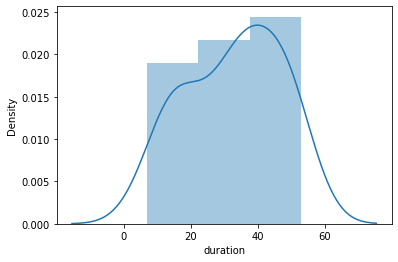

In [14]:
sns.distplot(policy.duration)

## 아래의 그래프는 policy type에 따른 기간 막대 그래프 시각화이며, 교육과 연련된 정책이 가장 오래 지속되었음을 알 수 있습니다.

### cf) 빈 구역은 결측치가 있기 때문입니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration', ylabel='type'>

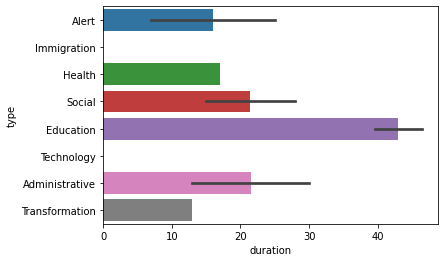

In [15]:
sns.barplot('duration', 'type', data = policy)

## 정책으로 인해 학교 수업을 온라인 강의로 진행을 하면서 개학을 미뤘음을 알 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration', ylabel='gov_policy'>

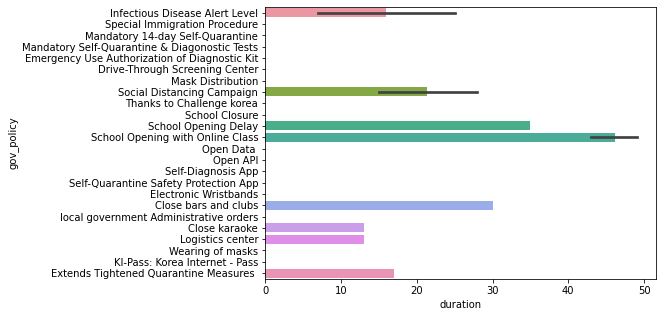

In [16]:
plt.figure(figsize = (7,5))
sns.barplot( 'duration', 'gov_policy',data = policy)

## detail에 따른 정책의 지속 기간을 확인해보면,

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration', ylabel='detail'>

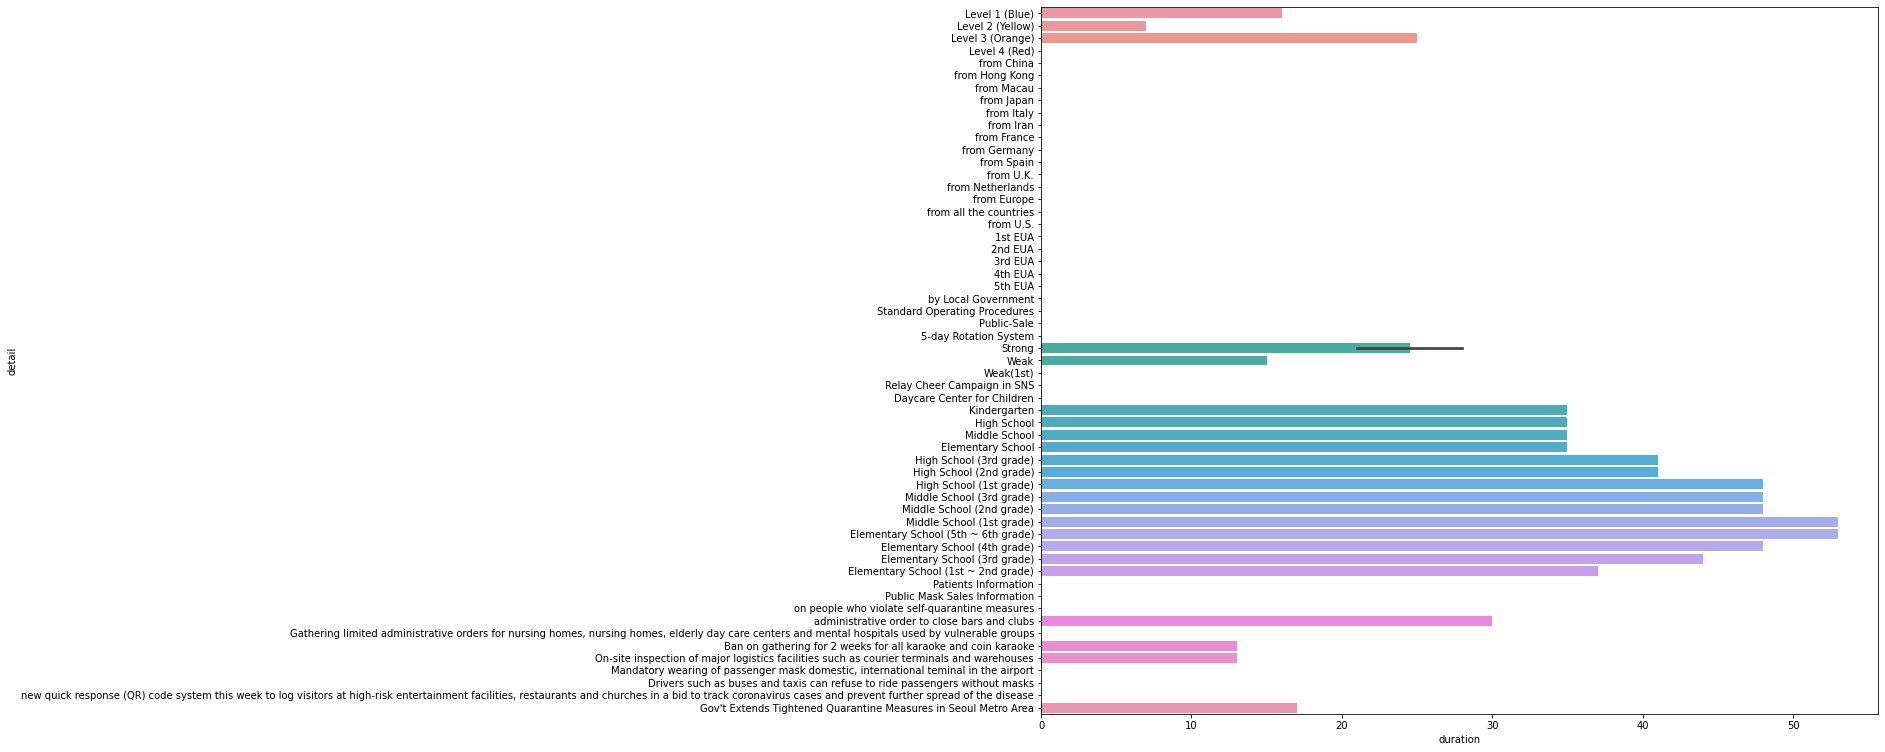

In [17]:
plt.figure(figsize = (15,13))
sns.barplot( 'duration', 'detail',data = policy)

detail에서 기간에서 결측치가 발생한 영역을 지워주고 다시 그래프를 만들면 좋을 것으로 보입니다. 예를 들어 'level 4'~ 5-day rotation system을 빼고 시각화를 하면 조금 더 읽기 수월할 것으로 보입니다.

우선, 위의 데이터를 보면, level 1~3까지의 기간과 유치원부터 고등학교 까지의 비대면 기간을 확인할 수 있습니다

## 'start_date'에서 month을 추출하고 나서, 새로운 열에 저장하기 위해서 다음의 과정을 수행

In [18]:
policy['start_month'] = policy['start_date'].dt.month

In [20]:
policy.head(20)

,policy_id,country,type,gov_policy,detail,start_date,end_date,duration,start_month
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19,16.0,1
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27,7.0,1
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22,25.0,1
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT,NaN,2
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaT,NaN,2
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaT,NaN,2
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaT,NaN,2
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaT,NaN,3
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaT,NaN,3
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaT,NaN,3


## 아래는 다양한 정책의 시작을 보여줍니다.

### 1월에 감염병 Alert가 나왔음을 알 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start_month', ylabel='type'>

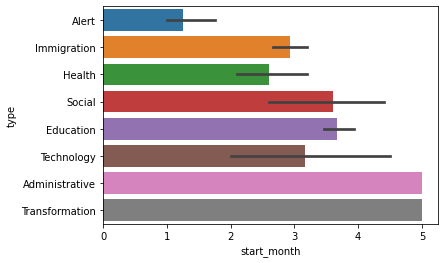

In [21]:
sns.barplot( 'start_month', 'type',data = policy)

## 코로나 바이러스가 발생한 후 제정된 정책 유형의 기술 분기에 있습니다. 환자 정보를 수집할 수 있도록 했습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start_month', ylabel='gov_policy'>

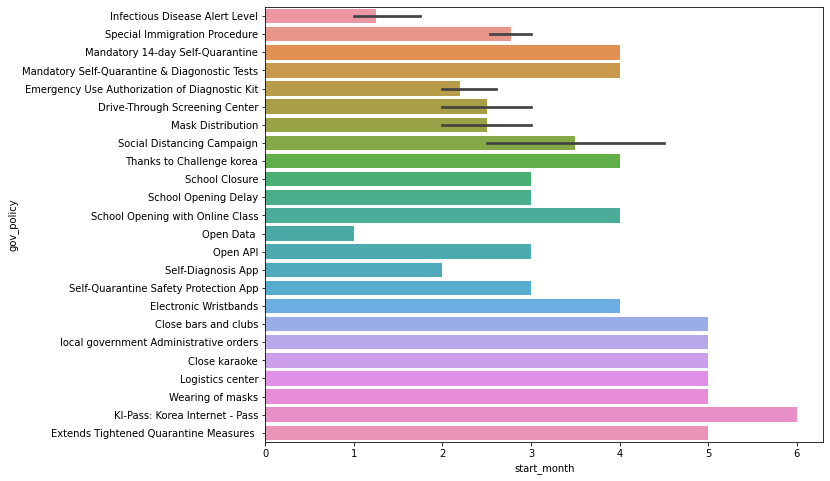

In [26]:
plt.figure(figsize= (10,8))
sns.barplot( 'start_month', 'gov_policy',data = policy)

## 다양한 정책에 대한 detail 을 시각화 한 것 입니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start_month', ylabel='detail'>

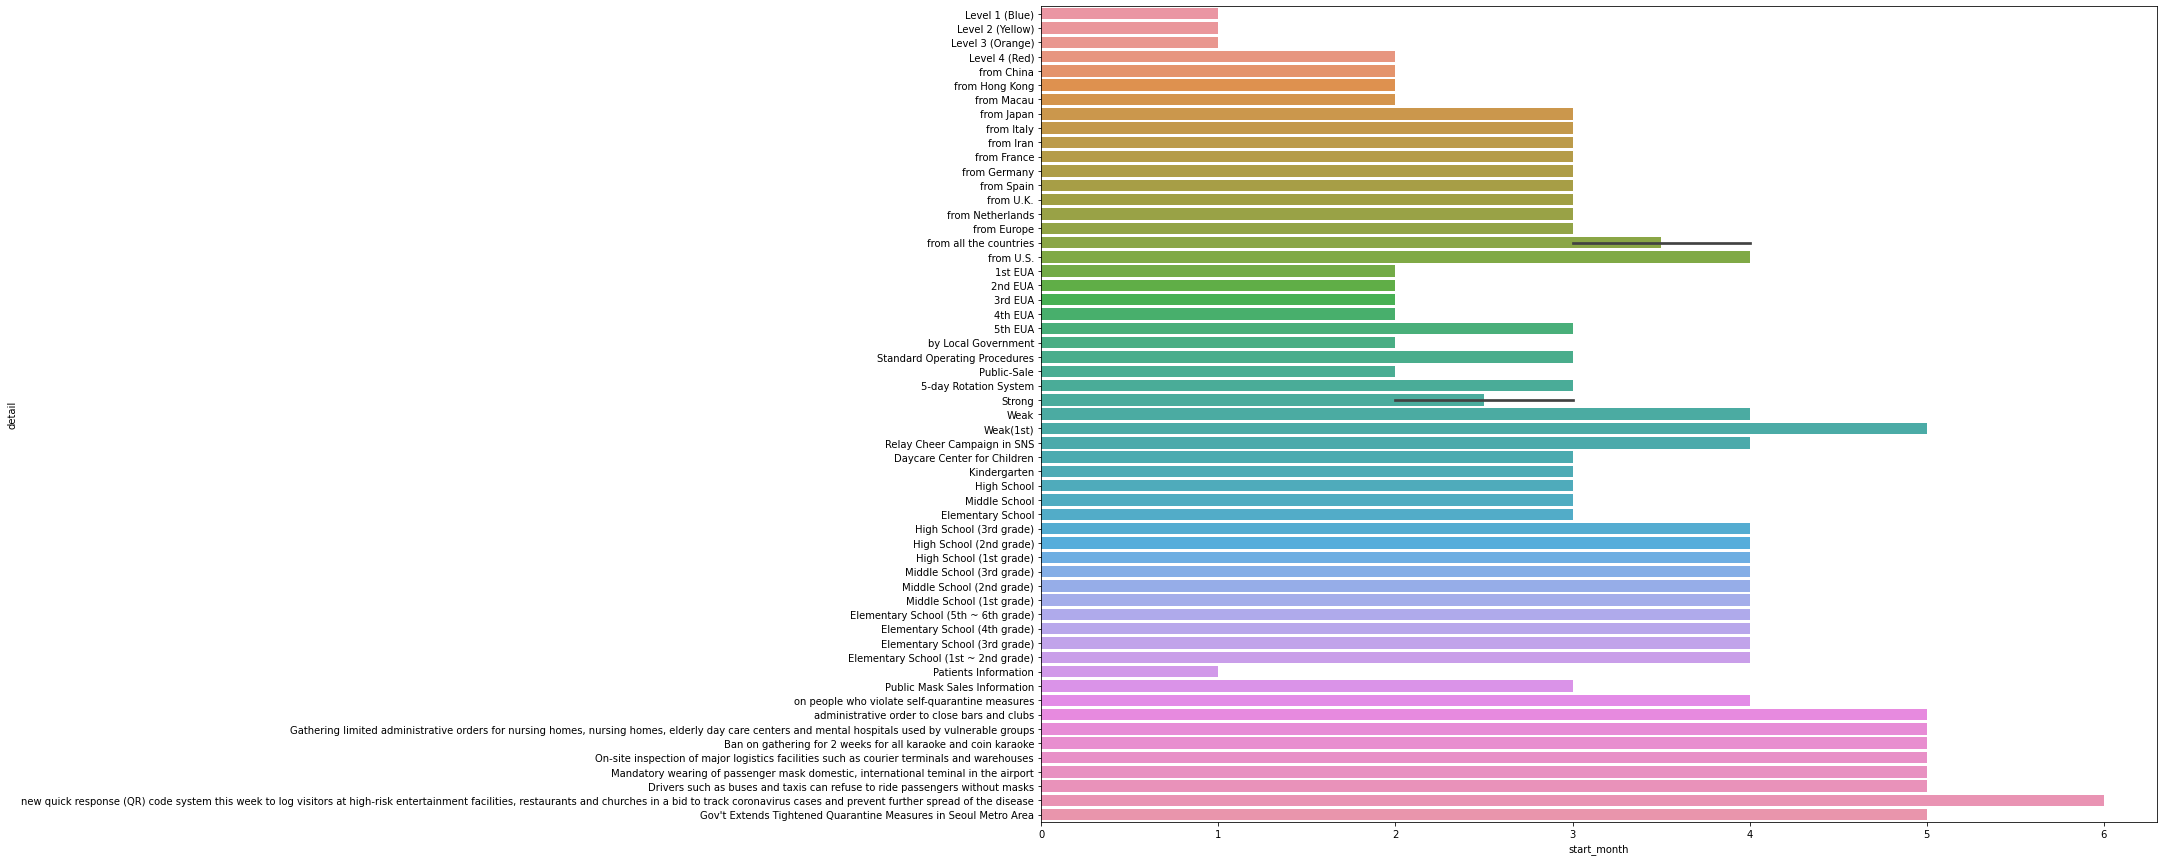

In [25]:
plt.figure(figsize= (20,15))
sns.barplot( 'start_month', 'detail',data = policy)